(424, 526)
(424, 526)


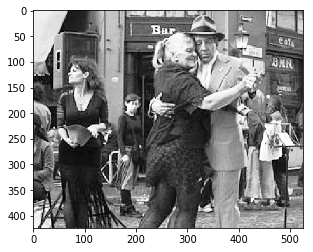

In [8]:
import matplotlib.image as mpimg
import pylab as py
import numpy as np
import math
from scipy import ndimage
import PIL

imageL = PIL.Image.open('BI/1.png')
imageL = imageL.convert('L')
imageL = np.array(imageL, 'double')
print(imageL.shape)
py.imshow(imageL, cmap=py.cm.Greys_r)

imageR = PIL.Image.open('BI/2.png')
imageR = imageR.convert('L')
imageR = np.array(imageR, 'double')
print(imageR.shape)
py.imshow(imageR, cmap=py.cm.Greys_r)

In [12]:
from sklearn.utils.random import sample_without_replacement

from math import sqrt


def sample_comb3(dims, nsamp):
    idx = sample_without_replacement(np.prod(dims), nsamp)
    return np.vstack(np.unravel_index(idx, dims)).T

def delinearize(array):
    size = sqrt(len(array))
    outarray = []
    temp = []
    counter = 1
    for i in range(len(array)):
        if size != counter:
            temp.append(array[i])
            counter += 1
        else:
            outarray.append(temp)
            temp=[]
            counter=1
    return outarray

# now we are picking random patches from the image
print ("getting patches from image...")
patch_size = 8
num_patches = 10000
num_max_possible_patches = (len(imageL)-patch_size) * (len(imageL[0])-patch_size)
num_max_patches = min(num_patches, num_max_possible_patches)
num_max_tries = min(num_patches*1.2, num_max_possible_patches)

# indices = pickRandom(num_max_tries, 1, len(img)-patch_size, 1, len(img[0])-patch_size)
indices = sample_comb3([len(imageL)-patch_size, len(imageL[0])-patch_size], num_max_tries)

patches = []


cnt = 0
for idx in indices:
    if cnt >= num_max_patches:
        break
    x = idx[0]
    y = idx[1]
    temp = []
    temp2 = []
    for i in range(patch_size):
        for j in range(patch_size):
            temp.append(imageL[x+i][y+j])
            temp2.append(imageR[x+i][y+j])
    mtemp = temp + temp2   
    if np.std(temp) > 0:
        patches.append(mtemp)
      
        cnt = cnt + 1

# print "patches size: "
print ("patches size: ", len(patches), " x ", len(patches[0]))


getting patches from image...
patches size:  10000  x  128


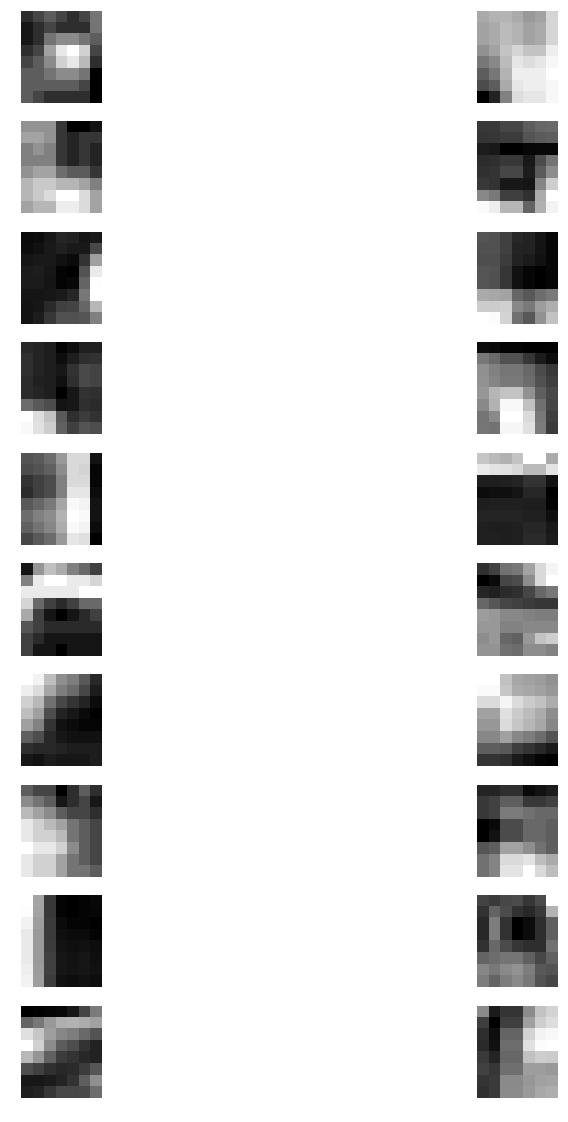

In [13]:
num_components = 10
k=0
#patch from right side img
fig = py.figure(figsize=(15,20))
for i in range(num_components):
    k = k+1
    fig.add_subplot(10,2,k)
    py.imshow(delinearize(patches[i][0:64]),interpolation='nearest',cmap=py.get_cmap('gray'))
    py.axis("off")
    k = k+1
    fig.add_subplot(10,2,k)
    py.imshow(delinearize(patches[i][64:]),interpolation='nearest',cmap=py.get_cmap('gray'))
    py.axis("off")
    
    

    

calculating PCA...
[0.55369551 0.26224087 0.03289896 0.02847545 0.02176237 0.01891395
 0.01061565 0.00817102 0.00732732 0.00686812 0.00571896 0.00541042
 0.0036917  0.00303981 0.00271188 0.00255843 0.00247832 0.00204998
 0.00186494 0.00160651]
(20, 128)
20


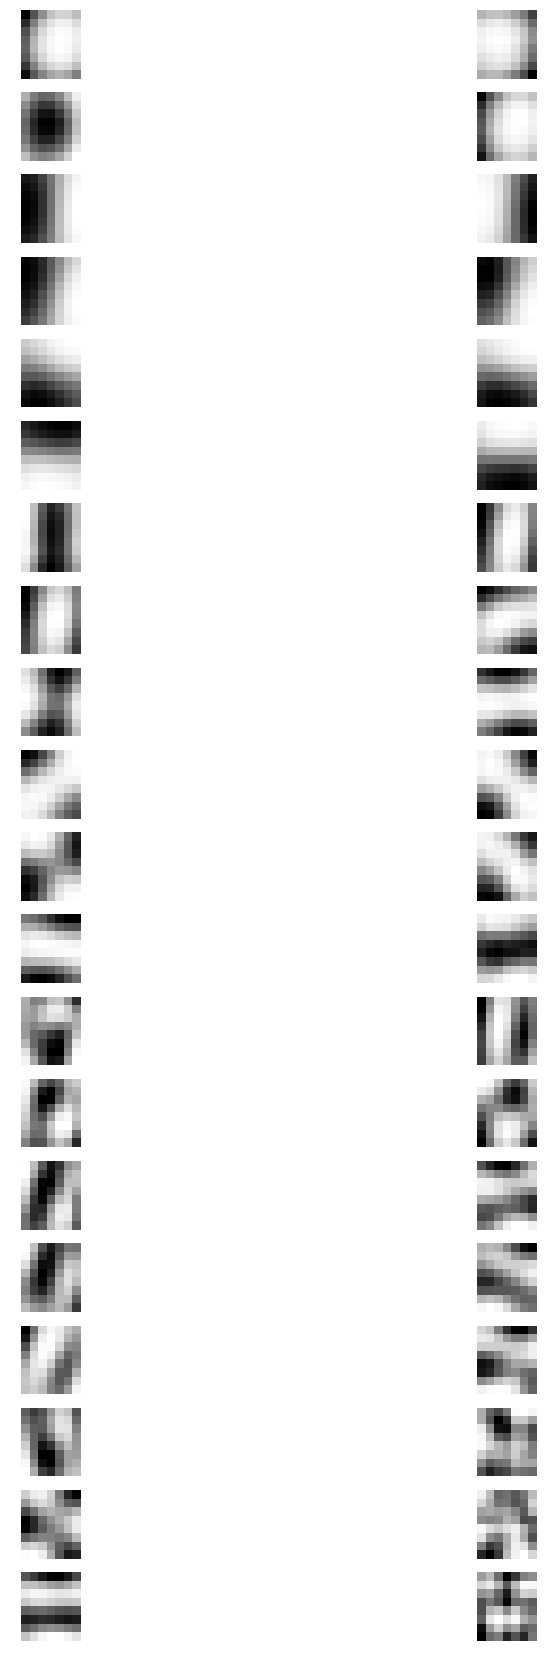

In [14]:
from sklearn import decomposition

def pcaComponents(array, components):
    pcatemp = decomposition.PCA(n_components=components)
    pcafit = pcatemp.fit(array)
    print(pcafit.explained_variance_ratio_)   
    return pcafit.components_

## PCA
print ("calculating PCA...")
pcacomp = pcaComponents(patches, 20)
print(pcacomp.shape)
#pcacomp2 = pcaComponents(patches2, components = num_components)
print(len(pcacomp))
num_components = 20
k=0

fig = py.figure(figsize=(15,30))
for i in range(num_components):
    k+=1
    fig.add_subplot(20,2,k)
    py.imshow(delinearize(pcacomp[i][:64]),cmap='Greys_r')
    py.axis("off")
    k+=1
    fig.add_subplot(20,2,k)
    py.imshow(delinearize(pcacomp[i][64:]),cmap='Greys_r')
    py.axis("off")
    
   

calculating ICA...


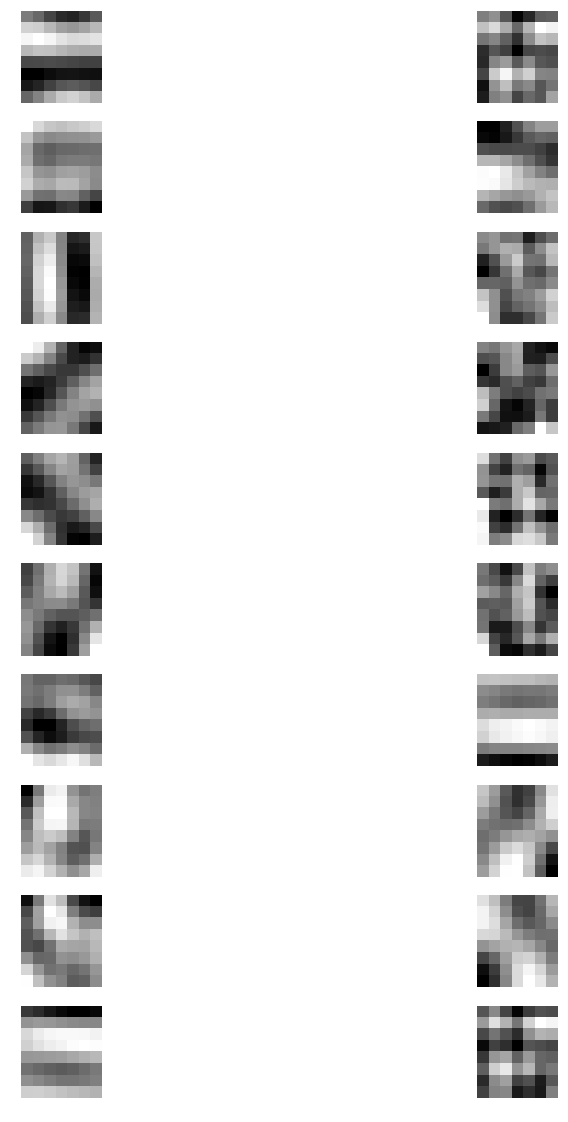

In [15]:
def icaComponents(array, components=10):
    icatemp = decomposition.FastICA(n_components=components)
    #icatemp = decomposition.FastICA(n_components=components, max_iter=500, whiten=False)
    return icatemp.fit(array).components_

## ICA
print ("calculating ICA...")

icacomp = icaComponents(patches, components = num_components)
#icacomp2 = icaComponents(patches2, components = num_components)

num_components = 10
k=0

fig = py.figure(figsize=(15,20))
for i in range(num_components):
    k+=1
    fig.add_subplot(10,2,k)
    py.imshow(delinearize(icacomp[i][:64]),cmap='gray')
    py.axis("off")
    k+=1
    fig.add_subplot(10,2,k)
    py.imshow(delinearize(icacomp[i][64:]),cmap='gray')
    py.axis("off")
    
  